In [1]:
import tensorflow as tf
tf.__version__ 

'2.15.0'

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
train_Path = r'/Users/vaibhavmk/Downloads/MarineSplit/train'
test_Path = r'/Users/vaibhavmk/Downloads/MarineSplit/test'

In [4]:
IMAGE_SIZE = [224, 224] # This is my desired image size... and also ResNet50 accepts image of 224*224.

In [5]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)


94765736/94765736 [==============================] - 24s 0us/step


In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [7]:
for layer in resnet.layers:
    layer.trainable = False
    

In [8]:
folders = glob(train_Path + '/*')
folders

['/Users/vaibhavmk/Downloads/MarineSplit/train/Seahorse',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Seaurchins',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Clams',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Searays',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Turtle',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Dolphin',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Penguin',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Squid',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Crabs',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Lobster',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Whale',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Eel',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Otter',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Starfish',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Seal',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Jellyfish',
 '/Users/vaibhavmk/Downloads/MarineSplit/train/Puffers',
 '/Users/vaibhavmk/Downloads/MarineSplit/t

In [9]:
car_label = ['Clams', 'Corals', 'Crabs', 'Dolphin', 'Eel', 'Fish', 'Jellyfish', 'Lobster', 'Nudibranchs', 'Octopus', 'Otter', 'Penguin', 'Puffers', 'Seahorse', 'Seal', 'Searays', 'Seaurchins', 'Sharks', 'Shrimp', 'Squid', 'Starfish', 'Turtle', 'Whale']


In [10]:
x = Flatten() (resnet.output)

In [11]:
prediction = Dense(len(folders), activation = 'softmax')(x)


In [12]:
model = Model(inputs = resnet.input, outputs = prediction)


In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [14]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [15]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [16]:
training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical' 

Found 8676 images belonging to 23 classes.


In [17]:
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 3692 images belonging to 23 classes.


In [24]:
history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/var/folders/b_/101911wx33v9vn6byy35y9380000gn/T/ipykernel_4648/2225438285.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
272/272 [==============================] - 265s 974ms/step - loss: 3.5965 - accuracy: 0.2661 - val_loss: 4.2772 - val_accuracy: 0.2002
Epoch 2/10
272/272 [==============================] - 266s 979ms/step - loss: 3.4323 - accuracy: 0.2787 - val_loss: 4.5427 - val_accuracy: 0.2056
Epoch 3/10
272/272 [==============================] - 264s 971ms/step - loss: 3.7006 - accuracy: 0.2766 - val_loss: 3.6019 - val_accuracy: 0.2373
Epoch 4/10
272/272 [==============================] - 266s 980ms/step - loss: 3.7232 - accuracy: 0.2894 - val_loss: 4.0325 - val_accuracy: 0.2370
Epoch 5/10
272/272 [==============================] - 260s 957ms/step - loss: 3.4793 - accuracy: 0.2958 - val_loss: 3.7605 - val_accuracy: 0.2061
Epoch 6/10
272/272 [==============================] - 262s 963ms/step - loss: 3.3410 - accuracy: 0.3046 - val_loss: 4.3481 - val_accuracy: 0.2170
Epoch 7/10
272/272 [==============================] - 263s 967ms/step - loss: 3.5593 - accuracy: 0.2890 - val_loss: 4.5979 -

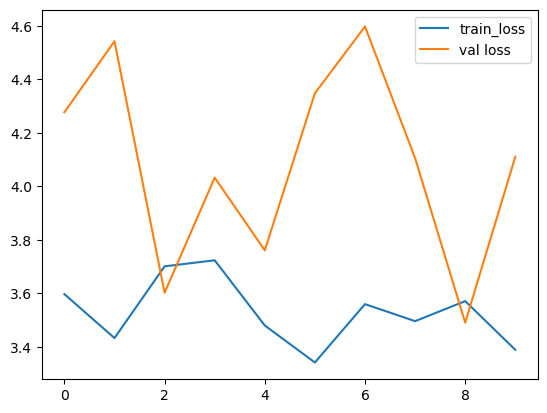

In [25]:

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

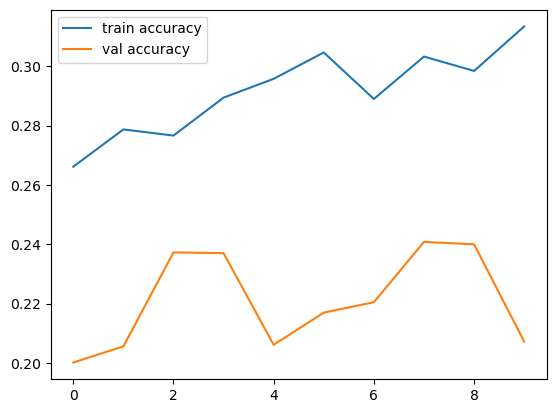

In [26]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

In [27]:
from tensorflow.keras.models import load_model

model.save('Marine_resnet50.h5')


/Users/vaibhavmk/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
prediction = model.predict(test_set)

116/116 [==============================] - 80s 687ms/step


In [29]:
prediction

array([[5.9753887e-07, 3.9376121e-04, 1.8318025e-04, ..., 2.6257268e-05,
        2.2844855e-04, 5.2992683e-02],
       [1.0157401e-06, 8.8615343e-04, 4.0194856e-05, ..., 1.4984532e-04,
        1.2847593e-04, 1.3295852e-01],
       [1.5935326e-05, 1.7809207e-02, 1.9865151e-05, ..., 1.3833094e-03,
        7.6210807e-04, 5.2856648e-09],
       ...,
       [4.4632529e-06, 1.2843239e-02, 3.6777250e-04, ..., 1.6269520e-04,
        5.9384888e-04, 1.3939555e-02],
       [2.4275878e-06, 5.4896512e-04, 6.0984086e-05, ..., 1.3144196e-03,
        1.1119689e-03, 1.0510059e-02],
       [2.2065060e-05, 5.7695215e-03, 6.8673267e-05, ..., 1.9433409e-03,
        5.0635380e-03, 8.5114239e-04]], dtype=float32)

In [30]:
prediction = np.argmax(prediction, axis = 1)
prediction

array([17, 19, 18, ..., 19, 19, 19])